<a href="https://colab.research.google.com/github/erdult/Statistics/blob/main/Bayesian%20Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this code, we define the Bayesian model as a linear function of the input variable x. We then define a negative log-likelihood function that computes the negative log-likelihood of the observed data given the parameters. The negative log-likelihood is minimized using the scipy.optimize.minimize function to find the optimal parameters that maximize the likelihood. We extract the optimized parameters and plot the observed data, the fitted model, and the true model for visualization. Note that this method assumes a Gaussian likelihood and uses optimization instead of sampling from the posterior distribution.

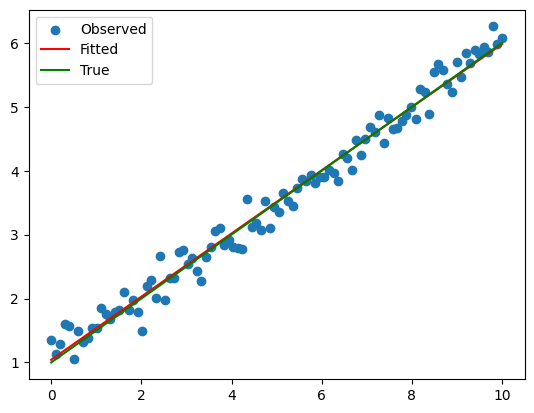

In [14]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Generate synthetic time series data
np.random.seed(0)
n = 100  # number of time steps
true_slope = 0.5
true_intercept = 1.0
true_noise = 0.2
x = np.linspace(0, 10, n)
y_true = true_slope * x + true_intercept
y_observed = y_true + np.random.normal(0, true_noise, n)

# Define the Bayesian model
def linear_model(params, x):
    slope, intercept, noise = params
    y_pred = slope * x + intercept
    return y_pred

def negative_log_likelihood(params, x, y_observed):
    slope, intercept, noise = params
    y_pred = linear_model(params, x)
    negative_log_likelihood = np.sum(0.5 * np.log(2 * np.pi * noise**2) + 0.5 * ((y_observed - y_pred) / noise)**2)
    return negative_log_likelihood

# Perform inference using optimization
initial_params = [0, 0, 0.1]  # initial values for slope, intercept, and noise
result = minimize(negative_log_likelihood, initial_params, args=(x, y_observed))

# Extract the optimized parameters
optimized_params = result.x
slope, intercept, noise = optimized_params

# Plot the results
plt.scatter(x, y_observed, label='Observed')
plt.plot(x, linear_model(optimized_params, x), 'r', label='Fitted')
plt.plot(x, y_true, 'g', label='True')
plt.legend()
plt.show()

# New section